# Libraries

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Dataset

In [2]:
base_dir = "../Data/animal_dataset/"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

folders = os.listdir(train_dir)

folders

['bird', 'butterfly', 'elephant', 'swan', 'tiger']

In [3]:
train_datagen = ImageDataGenerator(rescale = 1. / 255)
val_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 50),
    batch_size = 1)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (100, 50),
    batch_size = 1)

Found 20 images belonging to 5 classes.


Found 10 images belonging to 5 classes.


# Deep Learning Model Based on Module

## Define & Compile Model

In [4]:
img_input = layers.Input(shape = (100, 50, 3))

x = layers.Conv2D(16, 3, activation = 'relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(50, activation = 'sigmoid')(x)

output = layers.Dense(5, activation = 'softmax')(x)

model = Model(img_input, output)
model.compile(loss = 'mean_squared_error', optimizer = 'SGD', metrics = ['acc'])

## Fit Model

In [5]:
history = model.fit(
    train_generator,
    #steps_per_epoch = 20,
    epochs = 1000,
    validation_data = validation_generator,
    #validation_steps = 10,
    verbose = 2)

Epoch 1/1000


c:\Users\abdmu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 - 1s - 40ms/step - acc: 0.1000 - loss: 0.1662 - val_acc: 0.2000 - val_loss: 0.1649
Epoch 2/1000
20/20 - 0s - 7ms/step - acc: 0.1500 - loss: 0.1658 - val_acc: 0.2000 - val_loss: 0.1646
Epoch 3/1000
20/20 - 0s - 7ms/step - acc: 0.1000 - loss: 0.1654 - val_acc: 0.2000 - val_loss: 0.1643
Epoch 4/1000
20/20 - 0s - 7ms/step - acc: 0.2000 - loss: 0.1650 - val_acc: 0.2000 - val_loss: 0.1640
Epoch 5/1000
20/20 - 0s - 7ms/step - acc: 0.0500 - loss: 0.1647 - val_acc: 0.2000 - val_loss: 0.1637
Epoch 6/1000
20/20 - 0s - 6ms/step - acc: 0.2000 - loss: 0.1643 - val_acc: 0.2000 - val_loss: 0.1634
Epoch 7/1000
20/20 - 0s - 7ms/step - acc: 0.1500 - loss: 0.1640 - val_acc: 0.2000 - val_loss: 0.1632
Epoch 8/1000
20/20 - 0s - 6ms/step - acc: 0.1500 - loss: 0.1637 - val_acc: 0.2000 - val_loss: 0.1629
Epoch 9/1000
20/20 - 0s - 7ms/step - acc: 0.1500 - loss: 0.1634 - val_acc: 0.2000 - val_loss: 0.1627
Epoch 10/1000
20/20 - 0s - 7ms/step - acc: 0.2000 - loss: 0.1630 - val_acc: 0.2000 - val_loss: 0.1625
E

## Accuracy & Loss Plotting

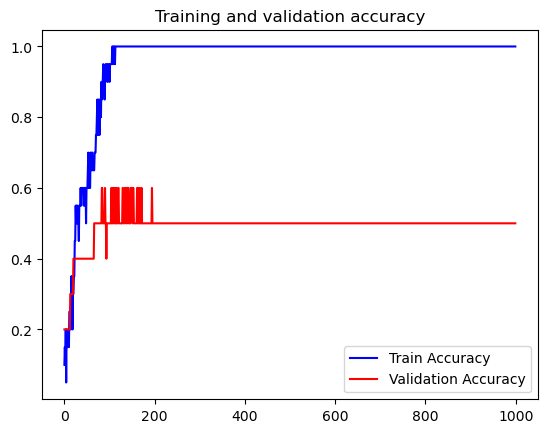

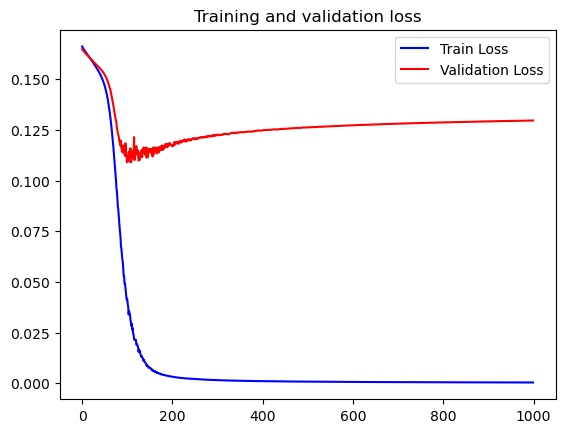

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

## Test Our Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Nilai Output Units:
 [[0.00271001 0.01023649 0.00460659 0.96637046 0.01607643]]


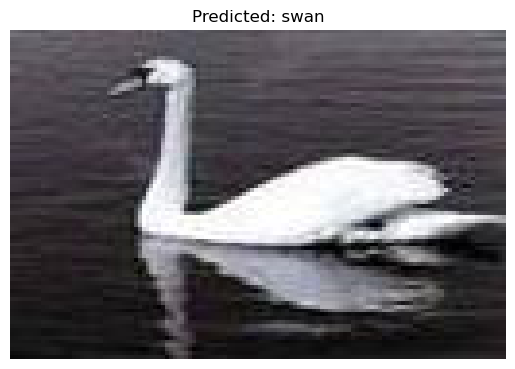

In [7]:
img = load_img(test_dir+'/data4.jpg', target_size=(100, 50))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
print("Nilai Output Units:\n", preds)
index_preds = np.argmax(preds)

plt.imshow(load_img(test_dir+'/data4.jpg'))
plt.axis('off')
plt.title(f"Predicted: {folders[index_preds]}")
plt.show()

# Best Model w/ Adjusting Params

## Define & Compile Model

In [8]:
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

img_input = layers.Input(shape=(100, 50, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(25, activation='sigmoid')(x)

output = layers.Dense(5, activation='softmax')(x)

model = Model(img_input, output)
optimizer = Adam(learning_rate=0.0003)
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['acc'])

## Fit Model

In [9]:
history = model.fit(
    train_generator,
    epochs = 1000,
    validation_data = validation_generator,
    verbose = 2)

Epoch 1/1000
20/20 - 2s - 78ms/step - acc: 0.2500 - loss: 0.1675 - val_acc: 0.3000 - val_loss: 0.1536
Epoch 2/1000
20/20 - 0s - 7ms/step - acc: 0.4000 - loss: 0.1504 - val_acc: 0.7000 - val_loss: 0.1392
Epoch 3/1000
20/20 - 0s - 7ms/step - acc: 0.7500 - loss: 0.1182 - val_acc: 0.6000 - val_loss: 0.1165
Epoch 4/1000
20/20 - 0s - 7ms/step - acc: 0.8000 - loss: 0.0809 - val_acc: 0.6000 - val_loss: 0.1057
Epoch 5/1000
20/20 - 0s - 8ms/step - acc: 1.0000 - loss: 0.0523 - val_acc: 0.7000 - val_loss: 0.0824
Epoch 6/1000
20/20 - 0s - 6ms/step - acc: 1.0000 - loss: 0.0309 - val_acc: 0.6000 - val_loss: 0.0917
Epoch 7/1000
20/20 - 0s - 7ms/step - acc: 1.0000 - loss: 0.0201 - val_acc: 0.7000 - val_loss: 0.0701
Epoch 8/1000
20/20 - 0s - 9ms/step - acc: 1.0000 - loss: 0.0138 - val_acc: 0.7000 - val_loss: 0.0769
Epoch 9/1000
20/20 - 0s - 10ms/step - acc: 1.0000 - loss: 0.0110 - val_acc: 0.8000 - val_loss: 0.0709
Epoch 10/1000
20/20 - 0s - 8ms/step - acc: 1.0000 - loss: 0.0095 - val_acc: 0.7000 - val_

## Accuracy & Loss Plotting

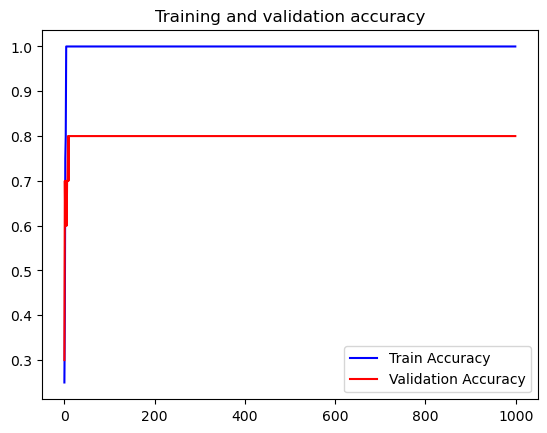

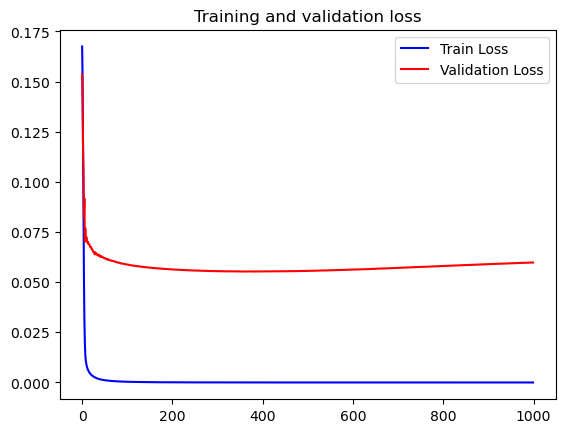

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

## Test Our Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Nilai Output Units untuk data1.jpg:
 [[9.99664068e-01 9.74774230e-05 1.14750605e-04 2.08628317e-05
  1.02839207e-04]]


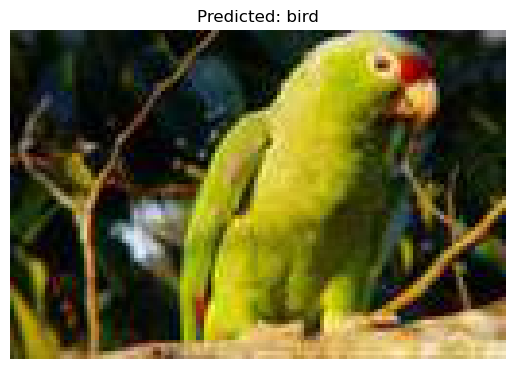

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Nilai Output Units untuk data2.jpg:
 [[1.07653948e-04 9.99712527e-01 3.08965464e-05 1.07392065e-04
  4.15733521e-05]]


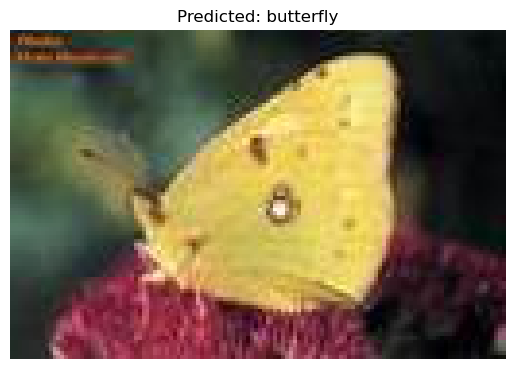

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Nilai Output Units untuk data3.jpg:
 [[1.2434852e-04 5.0956125e-05 9.9969947e-01 6.7971414e-05 5.7310481e-05]]


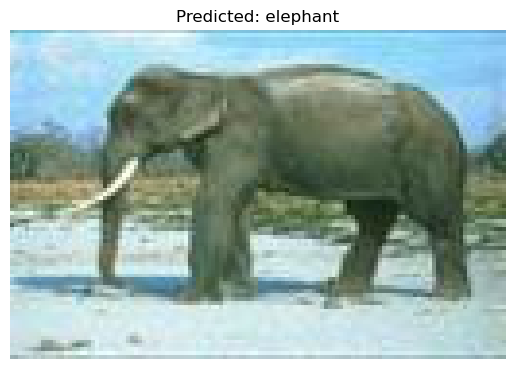

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Nilai Output Units untuk data4.jpg:
 [[1.9841375e-05 1.1192435e-04 6.1460349e-05 9.9972385e-01 8.2916624e-05]]


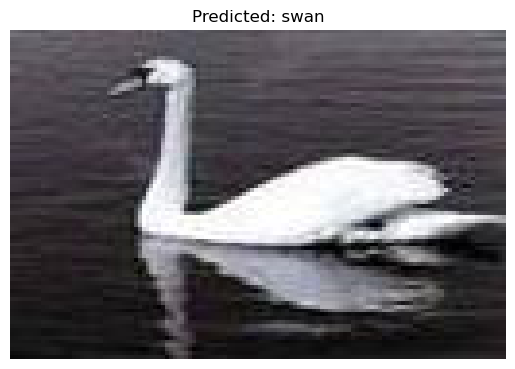

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Nilai Output Units untuk data5.jpg:
 [[1.4187931e-02 3.7773646e-02 3.5132248e-02 1.5854875e-04 9.1274762e-01]]


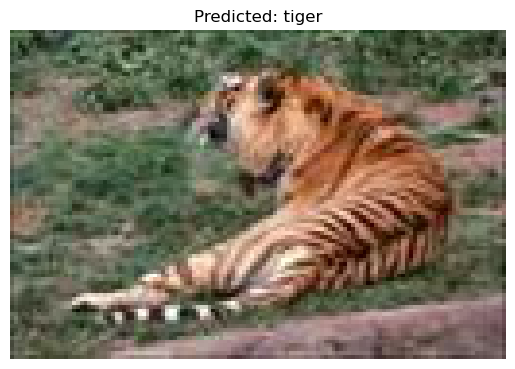

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Nilai Output Units untuk data6.jpg:
 [[9.99664068e-01 9.74774230e-05 1.14750605e-04 2.08628317e-05
  1.02839207e-04]]


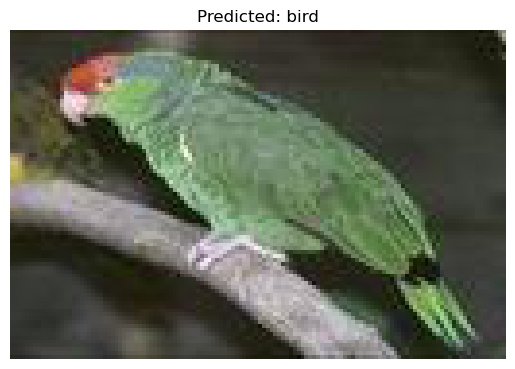

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Nilai Output Units untuk data7.jpg:
 [[1.07653948e-04 9.99712527e-01 3.08965464e-05 1.07392065e-04
  4.15733521e-05]]


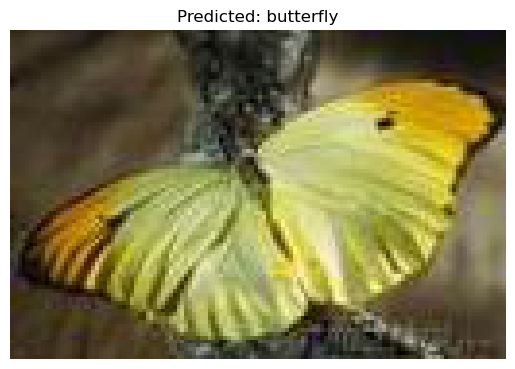

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Nilai Output Units untuk data8.jpg:
 [[1.2434852e-04 5.0956125e-05 9.9969947e-01 6.7971414e-05 5.7310481e-05]]


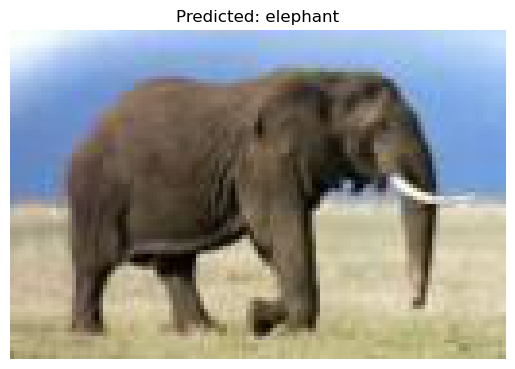

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Nilai Output Units untuk data9.jpg:
 [[1.9841375e-05 1.1192435e-04 6.1460349e-05 9.9972385e-01 8.2916624e-05]]


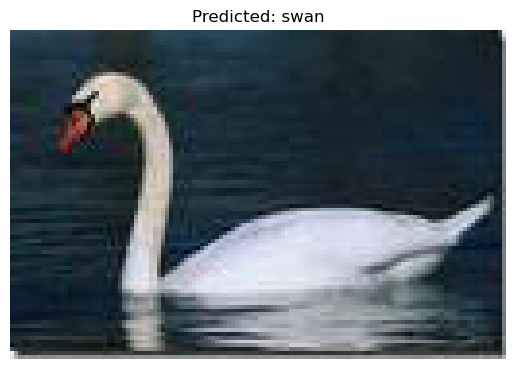

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Nilai Output Units untuk data10.jpg:
 [[1.1711739e-04 5.8215221e-05 5.5954715e-05 1.0037740e-04 9.9966824e-01]]


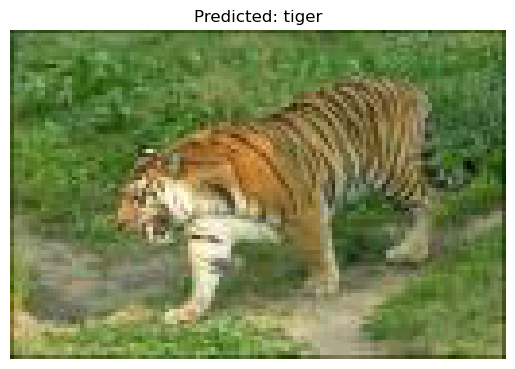

In [12]:
for i in range(1, 11):
    img_path = f"{test_dir}/data{i}.jpg"
    img = load_img(img_path, target_size=(100, 50))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)
    print(f"Nilai Output Units untuk data{i}.jpg:\n", preds)
    index_preds = np.argmax(preds)

    plt.imshow(load_img(img_path))
    plt.axis('off')
    plt.title(f"Predicted: {folders[index_preds]}")
    plt.show()